#### Install PyTorch
PyTorch (from Facebook) is NOT pre-installed on Googles CoLab 

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.7 kB/s 
     |████████████████████████████████| 8.8 MB 63.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


# A Perceptron in PyTorch
implementing our Numpy model with PyTorch

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generation
from sklearn.model_selection import train_test_split #for test set generation

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)
#y=y*2-1 #rescale to [-1,1]

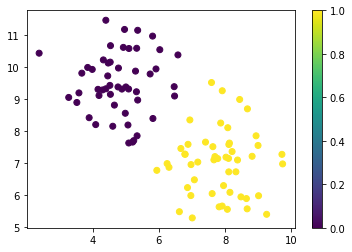

In [88]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

## Perceptron in PyTorch
* [PyTorch NN Module docu](https://pytorch.org/docs/stable/nn.html)

### define model

In [51]:
import torch 
class Perceptron(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(Perceptron, self).__init__()
        self.fc = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output 
        self.non_linear = torch.nn.Sigmoid() #non-linear activation 
    def forward(self, x): #build network
        output = self.fc(x) #w*X
        output = self.non_linear(output) # activation 
        return output

### prepare training and test data

In [52]:
#make blob data
x, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

#split in train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)



In [53]:
#have look
y_train

tensor([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.])

### get instance of model
and set optimizer

In [54]:
#get instance of perceptron model
model = Perceptron()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [55]:
#run test data theogh untrained model
model.eval() #set to eval mode
model(x_test)

tensor([[0.0486],
        [0.2129],
        [0.0162],
        [0.0619],
        [0.3069],
        [0.0863],
        [0.3955],
        [0.3377],
        [0.0644],
        [0.0300],
        [0.3719],
        [0.0330],
        [0.2368],
        [0.0535],
        [0.5028],
        [0.1507],
        [0.3017],
        [0.0186],
        [0.0209],
        [0.0293],
        [0.3774],
        [0.3685],
        [0.2099],
        [0.1391],
        [0.2262],
        [0.2320],
        [0.0358],
        [0.0348],
        [0.0287],
        [0.3076],
        [0.3056],
        [0.0301],
        [0.0353]], grad_fn=<SigmoidBackward>)

### train

In [61]:
model.train() #set to train mode
epoch = 50
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()


Epoch 0: train loss: 0.26395994424819946
Epoch 1: train loss: 0.26281702518463135
Epoch 2: train loss: 0.261686235666275
Epoch 3: train loss: 0.26056724786758423
Epoch 4: train loss: 0.2594600319862366
Epoch 5: train loss: 0.258364200592041
Epoch 6: train loss: 0.25727978348731995
Epoch 7: train loss: 0.2562062740325928
Epoch 8: train loss: 0.2551439702510834
Epoch 9: train loss: 0.2540923058986664
Epoch 10: train loss: 0.2530513107776642
Epoch 11: train loss: 0.25202080607414246
Epoch 12: train loss: 0.25100061297416687
Epoch 13: train loss: 0.24999046325683594
Epoch 14: train loss: 0.24899029731750488
Epoch 15: train loss: 0.24800018966197968
Epoch 16: train loss: 0.24701958894729614
Epoch 17: train loss: 0.24604851007461548
Epoch 18: train loss: 0.24508698284626007
Epoch 19: train loss: 0.24413461983203888
Epoch 20: train loss: 0.2431914508342743
Epoch 21: train loss: 0.242257222533226
Epoch 22: train loss: 0.24133194983005524
Epoch 23: train loss: 0.24041542410850525
Epoch 24: trai

### evaluate

In [84]:
model.eval() #set model to eval mode

#train 
y_pred = model(x_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
train_acc = y_train.shape[0]/torch.sum(y_pred == y_train.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("train ACC: ",train_acc.float())

train ACC:  tensor(1.)


In [86]:
#test 
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = y_test.shape[0]/torch.sum(y_pred == y_test.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("test ACC: ",test_acc.float())

test ACC:  tensor(1.)


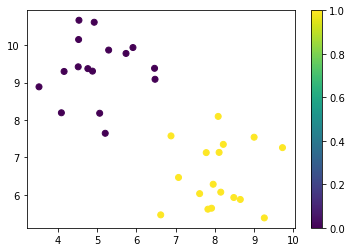

In [89]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.colorbar()